<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Calendar_Matching_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calendar Matching

Imagine that you want to schedule a meeting of a certain duration with a co-worker. You have access to your calendar and your co-worker's calendar (both of which contain your respective meetings for the day, in the form of `[startTime, endTime]`), as well as both of your daily bounds (i.e., the earliest and latest times at which you're available for meetings every day, in the form of `[earliestTime, latestTime]`).

Write a function that takes in your calendar, your daily bounds, your co-worker's calendar, your co-worker's daily bounds, and the duration of the meeting that you want to schedule, and that returns a list of all the time blocks (in the form of `[startTime, endTime]`) during which you could schedule the meeting, ordered from earliest time block to latest.

Note that times will be given and should be returned in military time. For example: `8:30`, `9:01`, and `23:56`.

Also note that the given calendar times will be sorted by start time in ascending order, as you would expect them to appear in a calendar application like Google Calendar.

Sample Input

```
calendar1 = [['9:00', '10:30'], ['12:00', '13:00'], ['16:00', '18:00']]
dailyBounds1 = ['9:00', '20:00']
calendar2 = [['10:00', '11:30'], ['12:30', '14:30'], ['14:30', '15:00'], ['16:00', '17:00']]
dailyBounds2 = ['10:00', '18:30']
meetingDuration = 30
```



Sample Output

```
[['11:30', '12:00'], ['15:00', '16:00'], ['18:00', '18:30']]
```



# Solution

In [1]:
# Time O(c1 + c2)
# Space O(c1 + c2)

def calendarMatching(calendar1, dailyBounds1, calendar2, dailyBounds2, meetingDuration):
  calendar1 = update_calendar(calendar1, dailyBounds1)
  calendar2 = update_calendar(calendar2, dailyBounds2)
  merged_calendar = get_merged_calendar(calendar1, calendar2)
  flatten_calendar = get_flatten_calendar(merged_calendar)
  return get_common_availabilities(flatten_calendar, meetingDuration)

def update_calendar(calendar, dailyBounds):
  calendar.insert(0, ['0:00', dailyBounds[0]])
  calendar.append([dailyBounds[1], '24:00'])
  calendar = convert_calendar_to_min(calendar)
  return calendar

def convert_calendar_to_min(calendar):
  return list(map(lambda time: [time_to_min(time[0]), time_to_min(time[1])], calendar))

def time_to_min(time):
  hour, min = list(map(int, time.split(':')))
  return (hour * 60) + min

def get_merged_calendar(calendar1, calendar2):
  pointer1, pointer2 = 0, 0
  merged_calendar = []
  while pointer1 < len(calendar1) or pointer2 < len(calendar2):
    if pointer1 < len(calendar1) and pointer2 < len(calendar2):
      if calendar1[pointer1][0] <= calendar2[pointer2][0]:
        merged_calendar.append(calendar1[pointer1])
        pointer1 += 1
      else:
        merged_calendar.append(calendar2[pointer2])
        pointer2 += 1
    elif pointer1 < len(calendar1):
      merged_calendar.append(calendar1[pointer1])
      pointer1 += 1
    elif pointer2 < len(calendar2):
      merged_calendar.append(calendar2[pointer2])
      pointer2 += 1
  return merged_calendar

def get_flatten_calendar(calendar):
  flattened_calendar = [calendar[0][:]]
  for i in range(1 , len(calendar)):
    current_meeting = calendar[i]
    previous_meeting = flattened_calendar[-1]
    if previous_meeting[1] >= current_meeting[0]:
      flattened_meeting = [min(previous_meeting[0], current_meeting[0]), max(previous_meeting[1], current_meeting[1])]
      flattened_calendar[-1] = flattened_meeting
    else:
      flattened_calendar.append(current_meeting[:])
  return flattened_calendar

def get_common_availabilities(calendar, meetingDuration):
  common_availabilities = []
  for i in range(1, len(calendar)):
    start = calendar[i - 1][1]
    end = calendar[i][0]
    if end - start >= meetingDuration:
      common_availabilities.append([start, end])
  return list(map(lambda minutes: [min_to_time(minutes[0]), min_to_time(minutes[1])], common_availabilities))

def min_to_time(minutes):
  hour = minutes // 60
  minutes = minutes % 60
  hour = str(hour)
  minutes = '0' + str(minutes) if  minutes < 10 else str(minutes)
  return hour + ':' + minutes


In [2]:
calendar1 = [['9:00', '10:30'], ['12:00', '13:00'], ['16:00', '18:00']]
dailyBounds1 = ['9:00', '20:00']
calendar2 = [['10:00', '11:30'], ['12:30', '14:30'], ['14:30', '15:00'], ['16:00', '17:00']]
dailyBounds2 = ['10:00', '18:30']
meetingDuration = 30
calendarMatching(calendar1, dailyBounds1, calendar2, dailyBounds2, meetingDuration)

[['11:30', '12:00'], ['15:00', '16:00'], ['18:00', '18:30']]

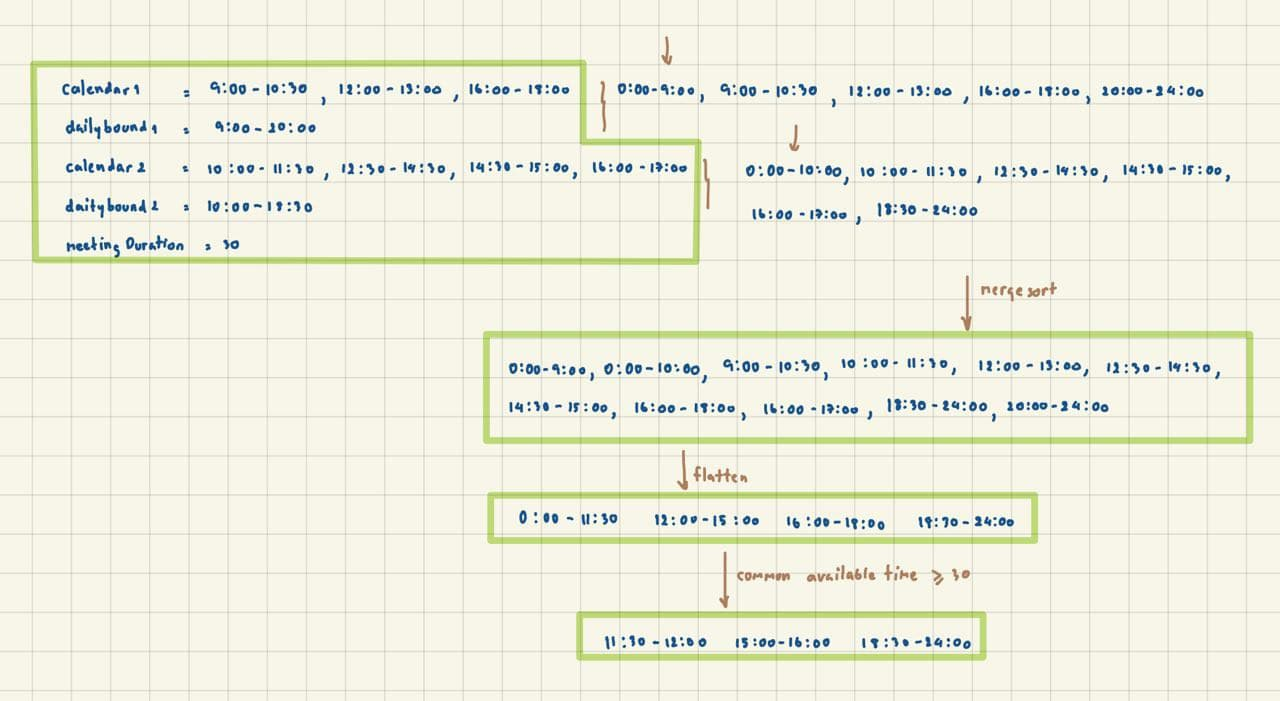